In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from tqdm import tqdm

%matplotlib inline
xcat_orig = pd.read_pickle('data/old_cat/srclist_lockman_032_wvsh_matchgaia_r50_cat.pkl')
xcat = xcat_orig
#xcat = xcat.query('DEC_corr>=58 & RA_corr <=160.97')
#xcat = xcat.query('~(sep_gaia<20  & ( (prlx_sn>4) | (pmdec_sn>4) ))')
#xcat = xcat_orig.query('sep_gaia>20 | sep_gaia.isnull()')
#xcat = xcat.query('prlx_sn<4 | pmra.isnull() | pmdec.isnull()')
#xcat = xcat.query('pmdec_sn<4 | pmra.isnull() | pmdec.isnull() ')
print(len(xcat))
cords = SkyCoord(xcat['RA_corr'], xcat['DEC_corr'], unit='deg', frame = 'fk5')
#https://docs.astropy.org/en/stable/wcs/wcstools.html#matplotlib-plots-with-correct-wcs-projection

expo = fits.open('data/old_cat/exp_img.fits')
expo_map = expo[0].data.T #Why? 
expo_map_masked = np.ma.masked_where(expo_map<=0, expo_map)

w = WCS(expo[0].header)

coords_w = w.world_to_pixel(cords)
coords_w_arr = (np.array([*coords_w]).T).astype(int)

#xcat['expo_map'] = expo_map[coords_w_arr[:,0], coords_w_arr[:,1]]


def plot_src_position(src_index):

    fig = plt.figure(figsize=(18,18))
    fig.add_subplot(111, projection=w)
    plt.imshow(expo_map.T, origin='lower', cmap='PuBu')
    plt.colorbar()
    plt.xlabel('RA')
    plt.ylabel('Dec')
    plt.grid()

    plt.scatter(coords_w[0], coords_w[1],   c = 'k', s=2, zorder = 10,)
    #plt.scatter(coords_w[0], coords_w[1],   c = 'k', s=1, zorder = 10, alpha = 0.2)
    #plt.scatter(coords_w[0], coords_w[1],   c = xcat.ML_EXP_1, s=2, zorder = 10, cmap='PuBu')
    plt.colorbar()
    
    try:
        ra_plot, dec_plot= xcat.loc[src_index]['RA_corr'], xcat.loc[src_index]['DEC_corr']
        coords_tmp = SkyCoord(ra_plot, dec_plot, unit='deg', frame = 'fk5')
        pix_x_plot, pix_y_plot = w.world_to_pixel(coords_tmp)
        plt.scatter([pix_x_plot], [pix_y_plot],   c = 'r', s=10, zorder = 11,)
    except:
        print('src not found')

    plt.show()
    

# dn/dcts_total hisst - (5-7 cts detecction limit). counts / exp = sensitivity  
#ra corr dec corr - position, MLFLUX
#MLCTS/MLEXP -> cts/s -> erg : MLFLUX/(ML_CTS_0/ML_EXP_1). 4.8-5 counts total for detection

#0.3 - 2 keV catalog 
#lim cts / expo(theta) * erg coeff -> sensitivity. Expo map not corrected vignetting , but erg coeff is.
#sep_gaia <= 20 arcsec; parallax/proper motion signofoant  snr > 4  -450 stars
#on map: ~1.5 times larger than exp of the source. Otherwise mean ration or exp / exp_map 

8310


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58785.208125 from DATE-OBS.
Set MJD-END to 58810.875104 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58785.208125 from DATE-OBS.
Set MJD-END to 58810.875104 from DATE-END'.


In [115]:
np.sum(xcat.gaia_star)

3660

In [127]:
pd.set_option('display.max_columns', 500)
snmin=4
mask='(pmra_sn>4 or pmdec_sn>4 or prlx_sn>4) and sep_gaia<15'
len(xcat.query(mask))

1001

In [124]:
xcat

,ID_SRC,RA,DEC,RADEC_ERR,EXT,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,EXT_LIKE,EXT_ERR,ID_CLUSTER,DIST_NN,ML_CTS_0,ML_CTS_ERR_0,ML_BKG_0,SRCDENS,TSTART,TSTOP,ML_EXP_1,APE_CTS_1,APE_BKG_1,APE_EXP_1,APE_EEF_1,APE_RADIUS_1,APE_POIS_1,RA_corr,DEC_corr,hpidx,sep_gaia,gaia,ra_match,dec_match,ra_gaia,dec_gaia,source_id,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,parallax_error,prlx_sn,pmra,pmra_error,pmdec,pmdec_error,pmra_sn,pmdec_sn,gaia_star
0,1,159.435510,57.198784,0.000000,0,66750.085938,5.663746e-12,2.380545e-12,0,0,1,156.809250,29244.017578,12291.635742,17.942661,0.000015,6.256512e+08,6.278688e+08,4871.123535,10428,14.270072,4870.865723,0.75,7.567884,0.000000,159.435370,57.198305,65743689844,2.271882,True,159.434616,57.198786,159.434616,57.198786,853989860956388736,15.854457,126.692635,16.117308,37.410126,15.323831,42.192974,0.096876,0.053428,1.813210,-0.057978,0.060399,-0.048088,0.067276,0.959910,0.714789,False
2,5,164.273234,58.077511,0.000000,0,12358.708008,1.627704e-12,7.211130e-13,0,0,5,113.486679,8326.765625,3688.963135,18.224602,0.000004,6.256512e+08,6.278688e+08,4826.105957,2642,13.689127,4825.153320,0.75,7.414415,0.000000,164.273094,58.077032,62358843002,1.098866,True,164.272522,58.077073,164.272522,58.077073,860221446185798656,17.746050,175.514511,17.424002,80.601303,16.336348,229.402115,0.048771,0.319041,0.152867,0.736473,0.338104,0.289390,0.393795,2.178245,0.734874,False
3,60,165.406673,57.491154,0.455702,0,4928.606934,1.373247e-12,4.209462e-14,0,0,55,174.527328,1179.482544,36.155079,2.493917,0.000033,6.256512e+08,6.278688e+08,810.286499,909,3.674417,811.295105,0.75,10.214846,0.000000,165.406533,57.490675,64607873434,0.848214,True,165.406590,57.490908,165.406590,57.490908,857143329024245888,9.993928,837.298584,10.395319,268.913147,9.438458,322.695404,8.486889,0.027799,305.295410,28.517200,0.042220,17.987431,0.038379,675.446113,468.682410,True
4,4,166.406711,58.855927,0.246261,0,14068.260742,1.360305e-12,5.164883e-14,0,0,4,181.032318,2960.306641,112.398567,7.476350,0.000014,6.256512e+08,6.278688e+08,2053.034180,2304,6.577723,2052.429688,0.75,7.917719,0.000000,166.406571,58.855448,59429013246,1.243132,True,166.406781,58.855776,166.406781,58.855776,860383349272777344,16.843491,423.955536,16.850843,89.331627,15.973063,167.545395,0.096874,0.083496,1.160222,0.025637,0.110132,0.076911,0.125472,0.232780,0.612970,False
6,7,158.791762,57.083134,1.111497,0,9716.670898,1.033121e-12,4.083801e-13,0,0,7,114.024544,5311.965332,2099.756104,19.727440,0.000007,6.256512e+08,6.278688e+08,4850.651855,2117,15.868386,4850.630371,0.75,7.570650,0.000000,158.791622,57.082655,66194823787,1.467427,True,158.790917,57.082795,158.790917,57.082795,854734436486835840,5.038663,527.674255,5.258223,755.665710,4.781574,531.250427,37.283730,0.136235,273.672150,66.235511,0.169901,36.382948,0.175495,389.847103,207.315572,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,6212,155.836434,56.284402,3.276881,0,8.493439,1.798548e-15,6.059837e-16,0,0,5451,77.443703,15.362273,5.176003,29.354263,0.000004,6.256512e+08,6.278688e+08,8058.040039,21,12.784801,8061.397949,0.75,5.642705,0.021427,155.836293,56.283923,69352747315,NaN,False,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8495,4451,160.883184,54.863436,3.520278,0,7.994558,1.752904e-15,5.932617e-16,0,0,3821,119.139931,16.765760,5.674287,31.513470,0.000007,6.256512e+08,6.278688e+08,9023.207031,30,18.300381,9024.296875,0.75,6.462280,0.007378,160.883044,54.862957,75133118912,NaN,False,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8496,1694,160.930042,55.025946,4.273491,0,6.765484,1.714765e-15,6.092452e-16,0,0,1413,41.436752,16.817144,5.975026,31.908537,0.000008,6.256512e+08,

In [129]:
pixarea =(expo[0].header['CDELT2'])**2 #in deg^2

In [53]:
#q = expo_map[coords_w_arr[:,0], coords_w_arr[:,1]]
#xcat['expo_map'] = q
xcat

,ID_SRC,RA,DEC,RADEC_ERR,EXT,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,EXT_LIKE,EXT_ERR,...,parallax,parallax_error,prlx_sn,pmra,pmra_error,pmdec,pmdec_error,pmra_sn,pmdec_sn,gaia_star
0,1,159.435510,57.198784,0.000000,0,66750.085938,5.663746e-12,2.380545e-12,0,0,...,0.096876,0.053428,1.813210,-0.057978,0.060399,-0.048088,0.067276,0.959910,0.714789,False
2,5,164.273234,58.077511,0.000000,0,12358.708008,1.627704e-12,7.211130e-13,0,0,...,0.048771,0.319041,0.152867,0.736473,0.338104,0.289390,0.393795,2.178245,0.734874,False
3,60,165.406673,57.491154,0.455702,0,4928.606934,1.373247e-12,4.209462e-14,0,0,...,8.486889,0.027799,305.295410,28.517200,0.042220,17.987431,0.038379,675.446113,468.682410,True
4,4,166.406711,58.855927,0.246261,0,14068.260742,1.360305e-12,5.164883e-14,0,0,...,0.096874,0.083496,1.160222,0.025637,0.110132,0.076911,0.125472,0.232780,0.612970,False
6,7,158.791762,57.083134,1.111497,0,9716.670898,1.033121e-12,4.083801e-13,0,0,...,37.283730,0.136235,273.672150,66.235511,0.169901,36.382948,0.175495,389.847103,207.315572,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,6212,155.836434,56.284402,3.276881,0,8.493439,1.798548e-15,6.059837e-16,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8495,4451,160.883184,54.863436,3.520278,0,7.994558,1.752904e-15,5.932617e-16,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8496,1694,160.930042,55.025946,4.273491,0,6.765484,1.714765e-15,6.092452e-16,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8497,6914,161.200088,54.859166,3.911239,0,6.506335,1.708475e-15,6.015672e-16,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


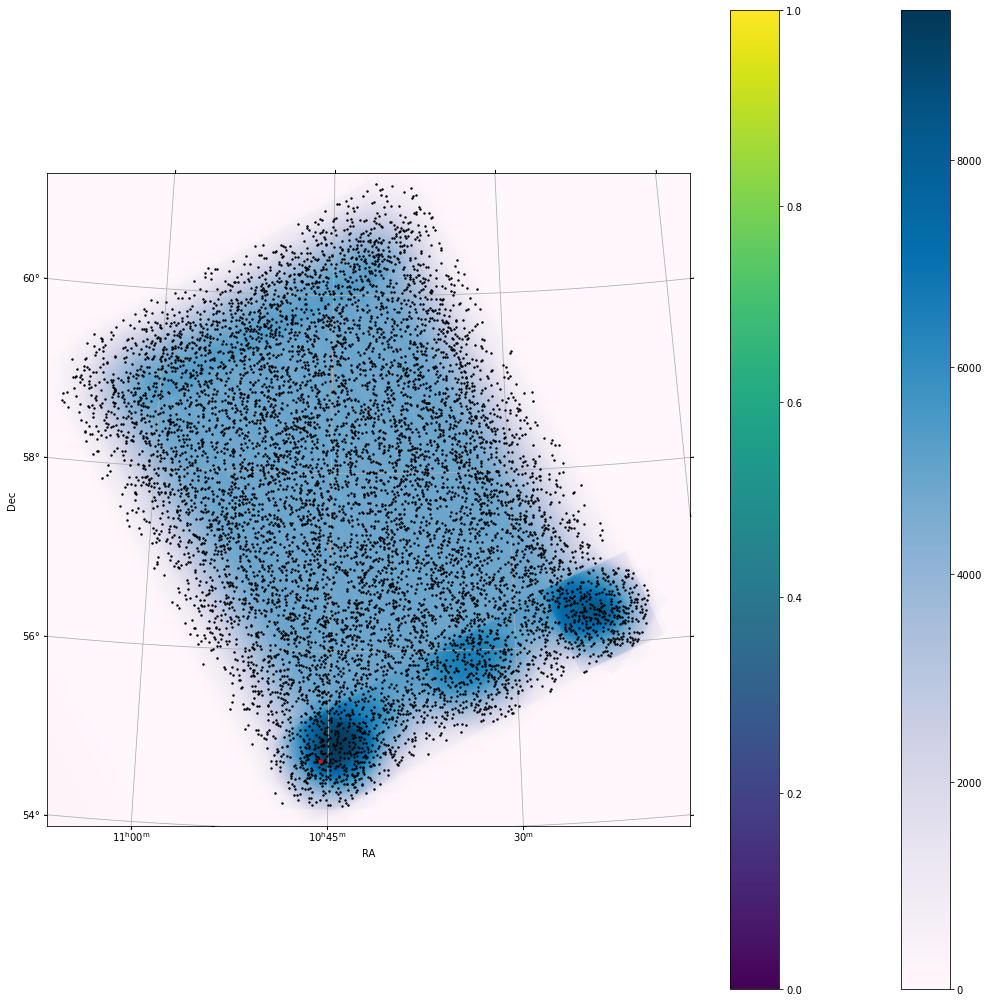

In [54]:
#%matplotlib auto
plot_src_position(8498)
#%matplotlib inline

In [55]:
# print(xcat.loc[2][['RA_corr','DEC_corr', 'ML_EXP_1']])
# #print(np.std(xcat.ML_EXP_1/xcat.expo_map))
# print(w.world_to_pixel(SkyCoord(161.403805, 54.770838, unit='deg', frame = 'fk5')))
# print(expo_map[2761,660])

In [56]:

#-----------------------------------------------------------------------------------------
def lnls_xy(f):
   """
   For an arbitrary input array f compute 2 arrays x,y
   for plotting cumulative logN-logS-like curve, making a step on each vallue of f
   array f does not have to be sorted
   returns tuple (x,y)
   for plotting use plt.plot(*lnls_xy(fx))
   """
   zz=np.sort(f)[::-1]
   n=np.arange(0,len(zz),1)

   x=np.array(np.transpose([zz,zz])).flatten()
   y=np.array(np.transpose([n,n+1])).flatten()

   return x,y


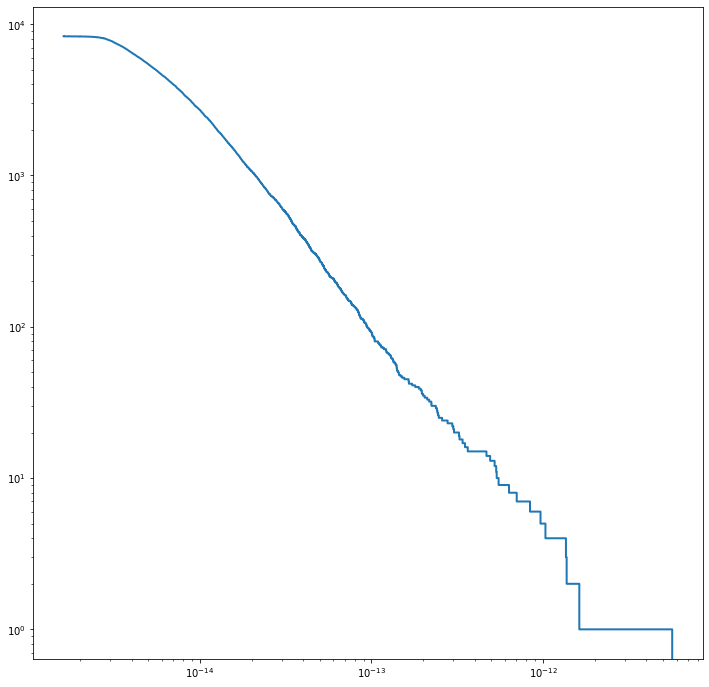

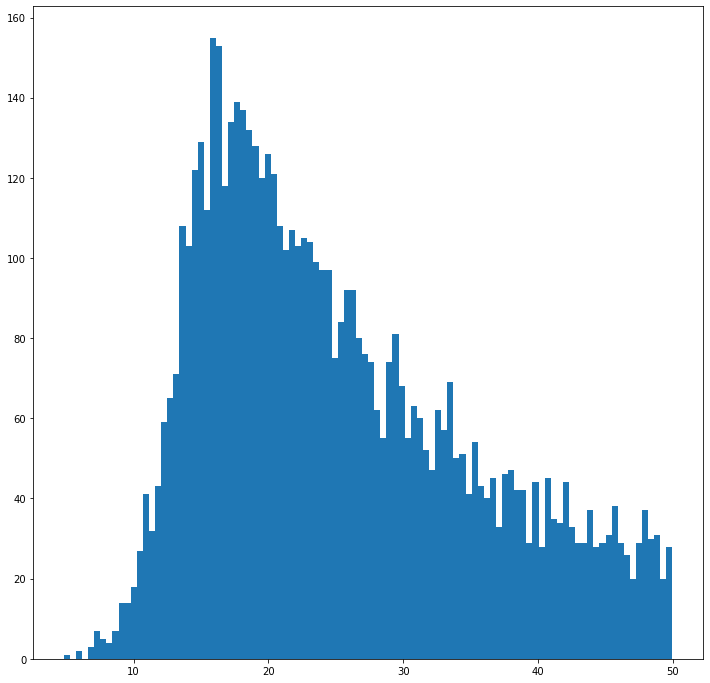

In [57]:

fig,  ax1 =  plt.subplots( figsize = (12,12))

fx=np.sort(xcat.ML_FLUX_0)[::-1]
ax1.loglog(*lnls_xy(fx), linewidth=2, label='matched');



fig,  ax1 =  plt.subplots( figsize = (12,12))
plt.hist(xcat.ML_CTS_0[xcat.ML_CTS_0<50], bins=100);


histogram of detected counts ->  (5-7 cts detecction limit, actual minimal value - **4.818**). 

limiting count / exp = sensitivity  (cts/s)



MLCTS/MLEXP -> count rate (cts/s) -> erg : MLFLUX/(ML_CTS_0/ML_EXP_1). 4.8-5 counts total for detection

#0.3 - 2 keV catalog 
#lim cts / expo(theta) * erg coeff -> sensitivity. Expo map not corrected vignetting , but erg coeff is.
#sep_gaia <= 20 arcsec; parallax/proper motion signofoant  snr > 4  -450 stars
#on map: ~1.5 times larger than exp of the source. Otherwise mean ration or exp / exp_map 

In [87]:
lim_cts = 12#np.min(xcat.ML_CTS_0[xcat.ML_CTS_0<50])
print(lim_cts)

sens_rate = lim_cts/expo_map_masked

12


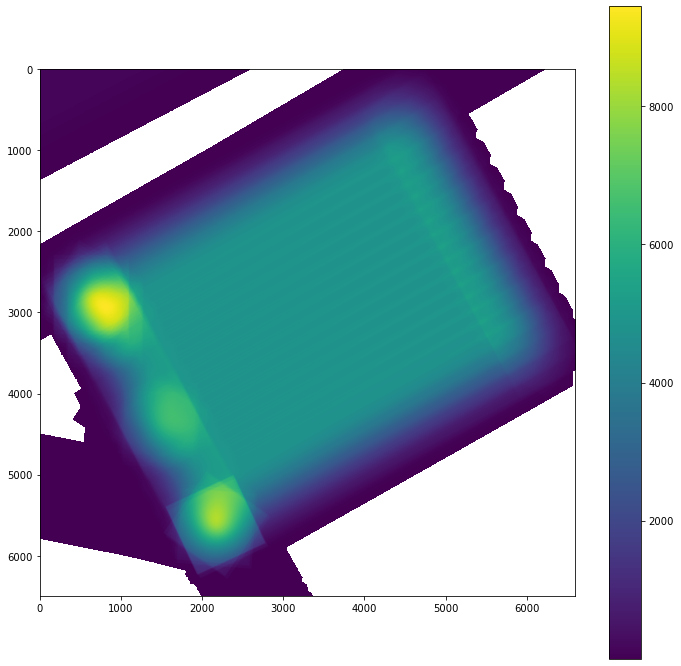

In [88]:
plt.figure(figsize=(12,12))
plt.imshow(expo_map_masked)
plt.colorbar()

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_62949/165604092.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sens_rate))


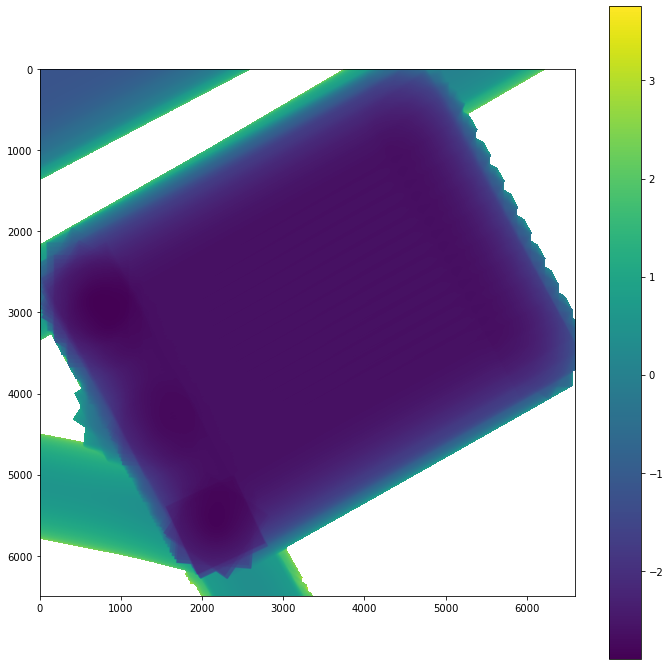

In [89]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(sens_rate))
plt.colorbar()

In [90]:
rates = xcat.ML_CTS_0/xcat.ML_EXP_1
flux2rate_ratio = xcat.ML_FLUX_0/rates
flux2rate_ratio = flux2rate_ratio[0]
print(np.mean(flux2rate_ratio))
print(np.std(flux2rate_ratio))

9.434e-13
0.0


In [91]:
sens_flux = sens_rate*flux2rate_ratio

In [92]:
np.min(sens_flux)

1.1984496e-15

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_62949/2889999701.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sens_flux), vmin = np.log10(4e-16), vmax = -14.5)


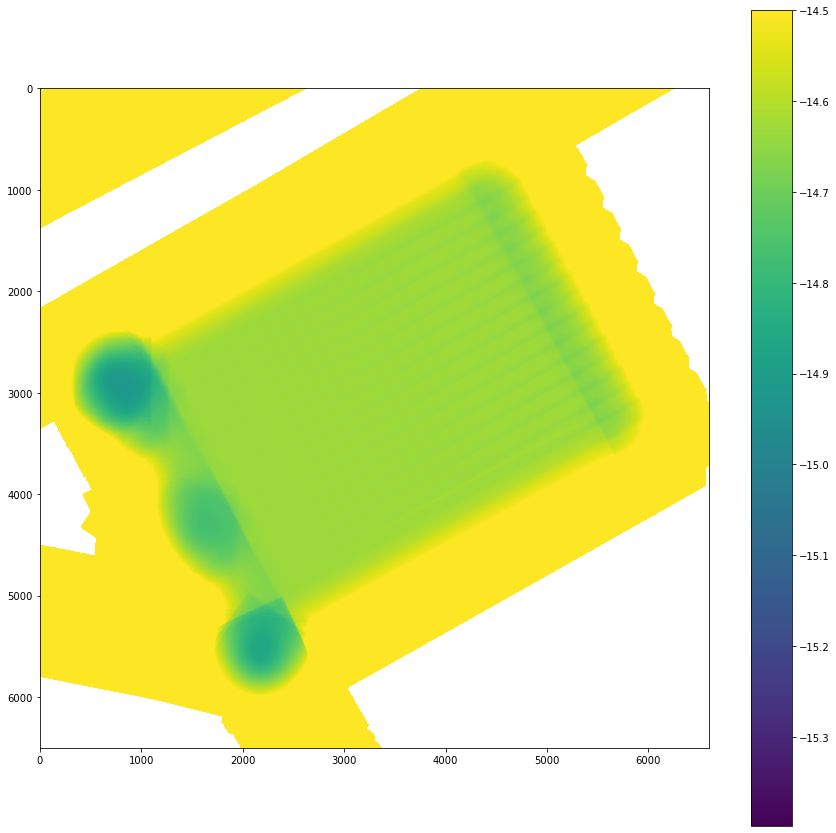

In [93]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(sens_flux), vmin = np.log10(4e-16), vmax = -14.5)
#plt.imshow(sens_flux, vmin = 1e-15, vmax = 1e-12)
plt.colorbar()

In [94]:
sens_flux

masked_array(
  data=[[6.893868342936621e-14, 6.890985720410525e-14,
         6.888557785170515e-14, ..., --, --, --],
        [6.889789709889002e-14, 6.88693690292265e-14,
         6.884868787278633e-14, ..., --, --, --],
        [6.885293659004976e-14, 6.883339384589071e-14,
         6.881731377242004e-14, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [95]:
sens_flux.flatten()

masked_array(data=[6.893868342936621e-14, 6.890985720410525e-14,
                   6.888557785170515e-14, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float32)

In [96]:
len(sens_flux[~sens_flux.mask])

31710086

In [97]:
print(np.sum(sens_flux<1e-14))
sens_flux[~sens_flux.mask]
print(np.sum(sens_flux[~sens_flux.mask]<1e-14))

20628382
20628382


In [101]:
fluxaxis = np.logspace(np.log10(np.min(sens_flux)), np.log10(np.min(5e-15)), 25)
n_pixs = []
for flux in tqdm(fluxaxis):
    n_pixs.append(np.sum(sens_flux<flux))
n_pixs = np.array(n_pixs)

100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


In [102]:
len(sens_flux[~sens_flux.mask])

31710086

(0.1, 30)

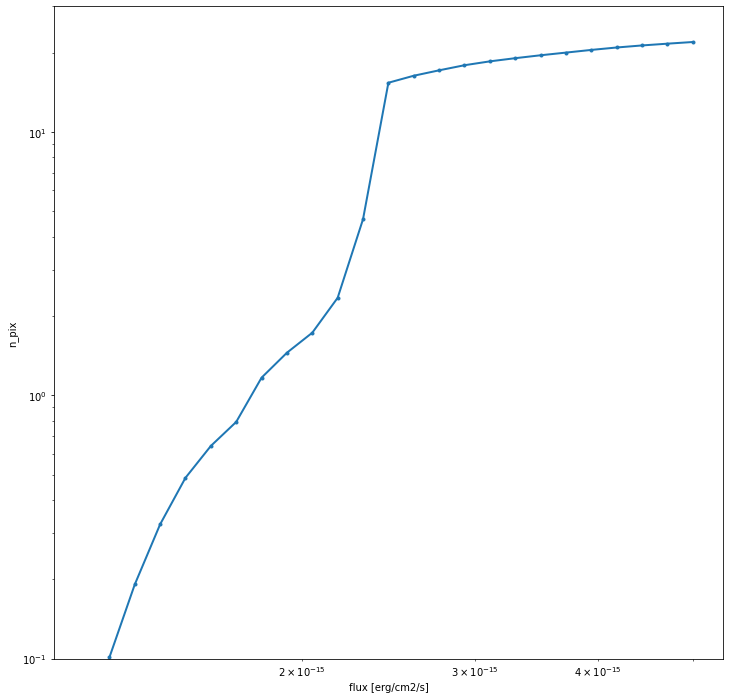

In [114]:
fig,  ax =  plt.subplots( figsize = (12,12))

ax.loglog(fluxaxis, n_pixs*(1.1e-3)**2, '.-', linewidth=2, label='n_pix<f');
ax.set_xlabel('flux [erg/cm2/s]')
ax.set_ylabel('n_pix')
ax.set_ylim(0.1,30)

In [133]:
n_pixs[-1]*pixarea

22.395184618043487

In [112]:
(1.1e-3)**2*1.5e7

18.150000000000002